Shape of X:  (2, 10000)
Shape of Xavg:  (2,)


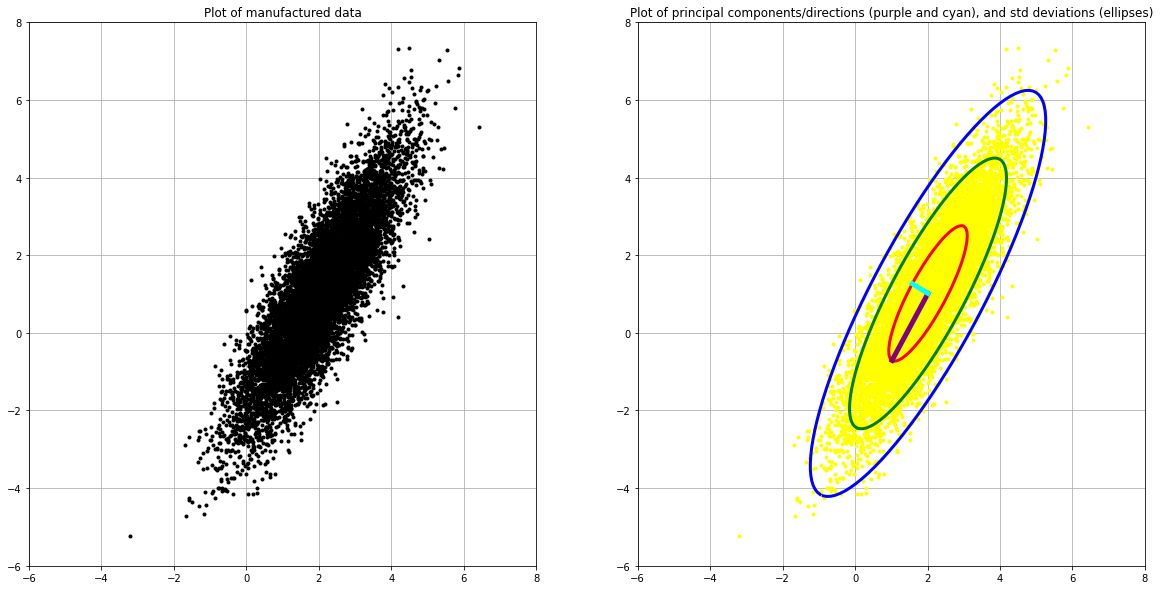

U  [[-0.49876925 -0.86673481]
 [-0.86673481  0.49876925]]
S  [1.99075175 0.49902776]


In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [20, 10]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by 60 degress, counter-clockwise

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))
print('Shape of X: ', X.shape)

fig = plt.figure()
ax1 = fig.add_subplot(121, title="Plot of manufactured data")
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

## f_ch01_ex03_1b

Xavg = np.mean(X, axis=1)                 # Compute mean
print('Shape of Xavg: ', Xavg.shape)
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=False)

ax2 = fig.add_subplot(122, title="Plot of principal components/directions (purple and cyan), and std deviations (ellipses)")
ax2.plot(X[0,:],X[1,:], '.', color='yellow')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + 1*Xstd[0,:], Xavg[1] + 1*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='g',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='b',linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
#
# https://www.youtube.com/watch?v=fkf4IBRSeEc&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=22
# Principal components: T = U @ Sigma
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='purple',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',linewidth=5)

plt.show()

print('U ', U)
print('S ', S)